# Data Analysis

Once the simulation is complete we enter the **Post Processing** stage where we _measure_ physical quantities and calculate transport coefficients.

Sarkas was developed to make this process as simple and straightforward as possible.

Let's import the needed packages.

In [21]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PostProcess
# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas',
                                              os.path.join('examples','Yukawa')))

input_file_name = os.path.join(example_directory, 'yukawa_mks_p3m.yaml')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


Similar to the **Pre Processing** and **Simulation** stages three lines are enough. 
The `run` method will calculate everything that was included in the input YAML file. This was shown in the [Quickstart notebook](https://murillo-group.github.io/sarkas/documentation/Quickstart.html) where we calculated the Radial Distribution Function. In this notebook we want to calculate the Radial Distribution Function, the Static Structure Function, the Dynamic Structure Function, and the Current Correlation Functions. Instead of executing `run` we will show how to compute observables and transport coefficient directly.

Each observable is identified by a class which is stored as an attribute of the `PostProcess`. The class names are 

- `rdf` = Radial Distribution Function
- `ssf` = Static Structure Function
- `dsf` = Dynamic Structure Function
- `ccf` = Current Correlation Function

In addition, we have the `Thermodynamics` class (name `therm`) which is used to store and calculate all the thermodynamic functions. The energy and temperature are read from the CSV file saved during the simulation stage.  

Other class names that we are not calculating here are:

- `ec` = Electric Current
- `vd` = Velocity Distribution
- `vacf` = Velocity AutoCorrelation Function
- `facf` = Flux AutoCorrelation Function ( mixtures only)

See our [Examples page](https://murillo-group.github.io/sarkas/examples/examples.html) for more info on how to calculate these.

In [22]:
# Let's initialize the class
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  yocp
Job directory:  Simulations/yocp_pppm
PostProcessing directory: 
 Simulations/yocp_pppm/PostProcessing

Equilibration dumps directory:  Simulations/yocp_pppm/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/yocp_pppm/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/yocp_pppm/Simulation/Equilibration/EquilibrationEnergy_yocp.csv
Production Thermodynamics file: 
 Simulations/yocp_pppm/Simulation/Production/ProductionEnergy_yocp.csv


The output tells us again where we can find the snapshots of our simulation and where the data computed in the Post Processing stage will be stored i.e. `PostProcessing Directory`.

## Thermodynamics
Let's first look at the temperature and energy evolution during the equilibration phase. This can be done by running the following cell.

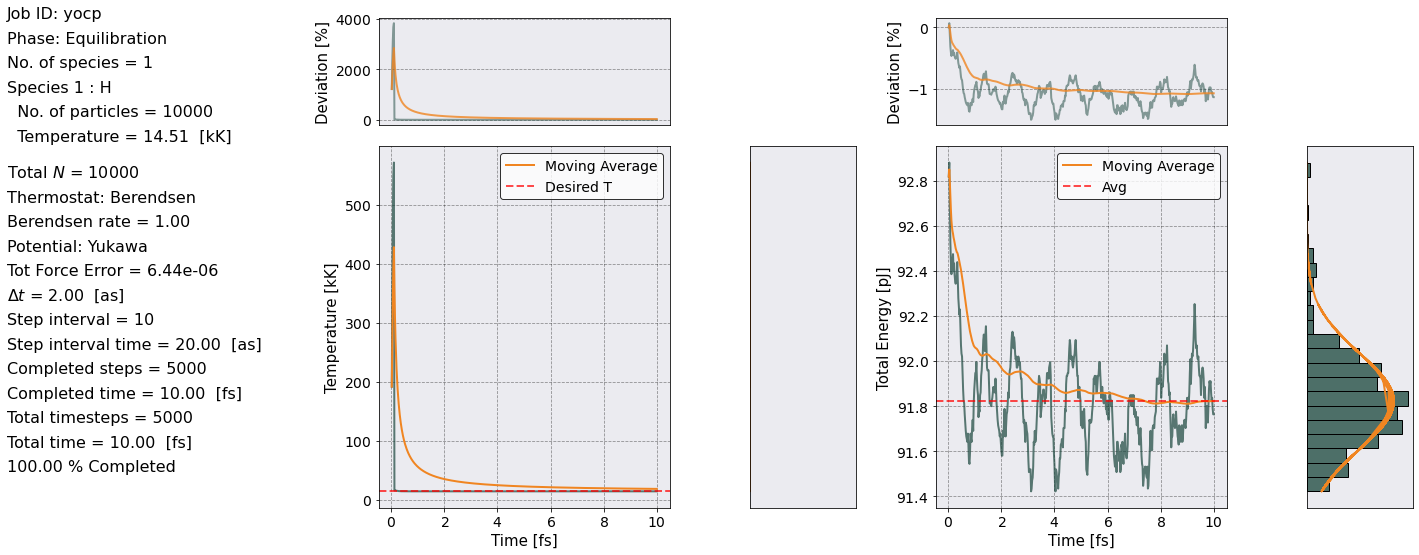

In [3]:
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(
    postproc, # Pass the Process class with simulation info
    phase = 'equilibration' # Choose the simulation phase
)

On the left most part of the figure above we reproduce some useful info. The main plots show the Temperature (left) and Total Energy (right) as a function of time. The temperature plot shows the thermostating temperature as a red dashed line. In the energy plot, instead, the red dashed line represents the average value. The yellow-orange line shows the moving average.

The plots above the main plots indicate the percentage deviation from the desired temperature (left) and the percentage deviation of the total energy from its initial value. Also in these plots, the yellow-orange line shows the moving average of the percentage deviation.

The bar plots to the right of the main plots instead are histograms of the Temperature and Total Energy, respectively. 

The most important thing to pay attention to is the temperature plot. We want to see that the Moving Average has approached the desired temperature. 

Let's now do the same for the production phase.

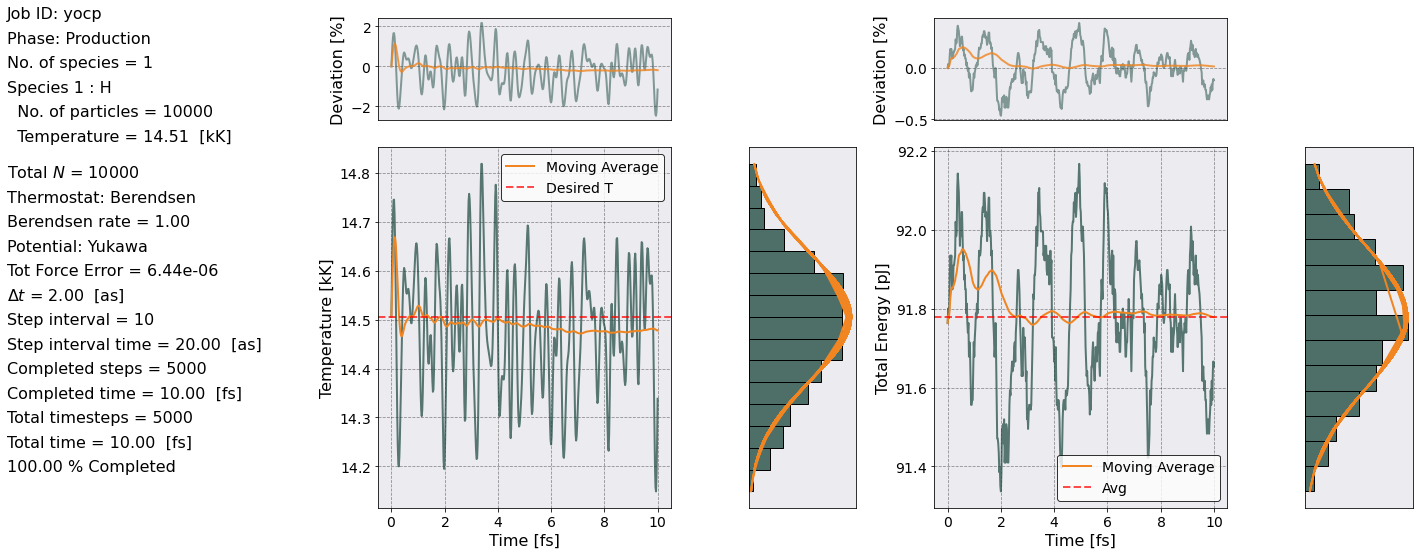

In [4]:
postproc.therm.temp_energy_plot(
    postproc, # Pass the Process class with simulation info
    phase = 'production' # Choose the simulation phase
)

We find a figure similar as before. In here though we notice that the Temperature oscillates around its desired value and has only $\sim \pm 2$% deviation from it. Similarly the Total Energy oscillates around its average value and stays within a $\sim -0.5$ % deviation. 

The bar plots are the next most important thing to notice. We want these to look like Maxwellian distributions. The orange lines in these plots are exactly this. 

## Radial Distribution Function
Let's calculate the Radial Distribution Function.

In [5]:
# Let's print some info first
postproc.rdf.setup(postproc.parameters)
postproc.rdf.pretty_print()

postproc.rdf.compute()



==================== Radial Distribution Function ==================== 

Data saved in: 
 Simulations/yocp_pppm/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp.csv
Data accessible at: self.ra_values, self.dataframe

No. bins = 500
dr = 0.0110 a_ws = 1.2540e-13 [m]
Maximum Distance (i.e. potential.rc)= 5.5100 a_ws = 6.2702e-11 [m]

Radial Distribution Function Calculation Time: 0 sec 1 msec 433 usec 602 nsec


As mentioned in the output the data is stored in a [`pandas.DataFrame()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and we can access it by 

In [6]:
postproc.rdf.dataframe

,Distance,H-H RDF
0,0.000000e+00,0.000000
1,1.881060e-13,0.000000
2,3.135100e-13,0.000000
3,4.389140e-13,0.000000
4,5.643180e-13,0.000000
...,...,...
495,6.213768e-11,0.962960
496,6.226309e-11,0.963315
497,6.238849e-11,0.962773
498,6.251389e-11,0.962993


Let's plot it!. This can be done by calling the `plot()` ([docs link](https://murillo-group.github.io/sarkas/api/sarkas.tools.observables.html#sarkas.tools.observables.Observable.plot:~:text=False.-,plot) ) method of the `Observable` class. We reproduce here the docs for convenience 

    def plot(self, scaling=None, acf=False, longitudinal=True, figname=None, show=False, **kwargs):
        """
        Plot the observable by calling the pandas.DataFrame.plot() function and save the figure.

        Parameters
        ----------
        scaling : float, tuple
            Factor by which to rescale the x and y axis.

        acf : bool
            Flag for renormalizing the autocorrelation functions. Default= False

        longitudinal : bool
            Flag for longitudinal plot in case of CurrenCurrelationFunction. Default = True

        figname : str
            Name with which to save the file. It automatically saves it in the correct directory.

        show : bool
            Flag for prompting the plot to screen. Default=False

        **kwargs :
            Options to pass to matplotlib plotting method.

        Returns
        -------
        axes_handle : matplotlib.axes.Axes
            Axes. See `pandas` documentation for more info

        """

This method takes the first column of the dataframe as the $x$ axis and all the other columns as $y$ axis. As you can see this method is a wrapper for the `pandas.DataFrame.plot()` method, as such you can pass the same parameters. We have added other parameters specific for our plots. In particular the parameter `scaling` is used for rescaling the $x$ and $y$ axis. 

In the following we want to plot the RDF as a function of $r/a_{ws}$ and relabel the x-axis.

<AxesSubplot:xlabel='$r/a_{ws}$'>

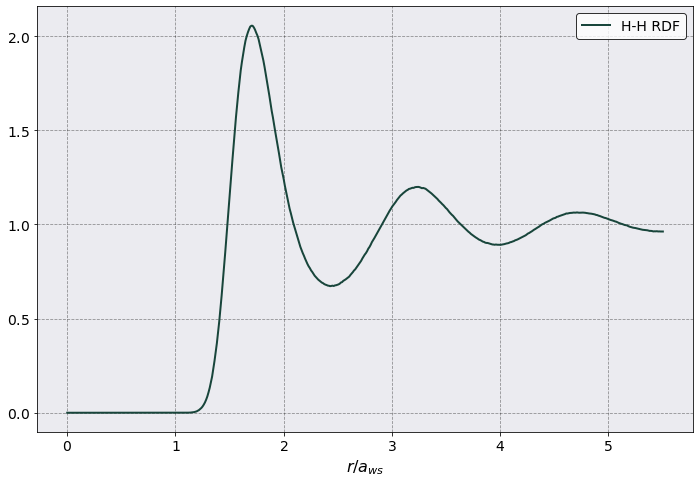

In [7]:
# Plot
postproc.rdf.plot(
    scaling=postproc.rdf.a_ws,
    xlabel = r'$r/a_{ws}$')

## Static Structure Factor

The next observable we want to measure is the Static Structure Factor. [Here](https://en.wikipedia.org/wiki/Structure_factor) you can find a long Wikipedia article about it.
In short it is the correlation function of the density fluctuations and Sarkas calculates it by

$$ S(\mathbf k) = \langle n(-\mathbf k) n(\mathbf k) \rangle $$.

For each timestep Sarkas calculates 

$$ n(\mathbf k, t) = \sum_j^N e^{- i \mathbf k \cdot \mathbf r_i(t)} $$

then takes the product $n(-\mathbf k,t) n(\mathbf k,t)$ and averages over the entire simulation time

$$  \langle n(-\mathbf k) n(\mathbf k) \rangle  = \frac{1}{M} \sum_{m}^M n(-\mathbf k, m \Delta t) n(\mathbf k, m \Delta t) $$

where $M$ is the total number of saved production timesteps and $\Delta t$ is our snapshot timestep.

Notice that $\mathbf k$ is a vector, as such there are multiple directions we need to consider. The first important thing to understand is that even though we are using periodic boundary conditions to simulate an infinite system, the number of wavelengths that can fit into the simulation box are finite and given by 

$$ \mathbf k (n_x, n_y , n_z) = 2\pi \left ( \frac{n_x}{L_x} , \frac{n_y}{L_y} ,  \frac{n_z}{L_z} \right ), \quad n_x, n_y, n_z = 0, 1, 2, \dots $$

where $n_{x,y,z}$ can take only integer values. This means that the minimum value is 

$$ k_{\rm min} = \frac{2\pi}{L}, $$ 

with $ L = L_x = L_y = L_z$. The calculation of $S(\mathbf k)$ for every combination of the triple $9n_x, n_y, n_z$ can be very slow. Therefore, it is often the case that researchers calculate only multiple integers of $k_{\rm min}$ along the three principal axis, that is

$$ \mathbf k(n_x,0,0), \quad \mathbf k(0, n_y, 0), \quad \mathbf k (0, 0, n_z). $$

This is the default way in Sarkas and it corresponds to the choice `angle_averaging = 'principal_axis'`. If we wanted to calculate every possible combination of the triplet then we would choose `angle_averaging = 'full'`.

In the following, we show code for calculating $S(\mathbf k)$ in a third way, `angle_averaging = 'custom'`. 
The code below will calculate $S(\mathbf k)$ up to $ka = 12$, where $a = a_{\rm ws}$ for brevity. It will calculate every possible combination of the triplet up to `max_aa_ka_value = 4.1` and then use multiple of the principal axis for the rest.

In [8]:
postproc.ssf.angle_averaging = 'custom'
postproc.ssf.max_ka_value = 12
postproc.ssf.max_aa_ka_value = 4.1
# Initialize the class with the new parameters. 
postproc.ssf.setup(postproc.parameters)
# Check
postproc.ssf.pretty_print()



===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/yocp_pppm/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_yocp.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 1.5898e+10 [1/m]

Angle averaging choice: custom
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 13, 13, 13
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	AA k_max = 4.0737 / a_ws = 3.5798e+11 [1/m]
	Maximum k harmonics = n_x, n_y, n_z = 66, 66, 66
	Largest wavector k_max = k_min * n_x
	k_max = 11.9406 / a_ws = 1.0493e+12 [1/m]

Total number of k values to calculate = 2902
No. of unique ka values to calculate = 379


As you can see Sarkas will calculate 2902 different combinations which correspond to 427 unique values of $ka$. This means that our $S(k)$ will be an array with 427 elements. 

Let's compute it! Again a progress bar will show up in your notebook, but does not display on the webpage. 

In [9]:
postproc.ssf.compute()


Calculating n(k,t) for slice 1/1.


  0%|          | 0/500 [00:00<?, ?it/s]


n(k,t) Calculation Time: 0 hrs 10 min 36 sec

Calculating S(k) ...


  0%|          | 0/1 [00:00<?, ?it/s]


Static Structure Function Calculation Time: 0 sec 314 msec 224 usec 580 nsec


As you can see Sarkas calculates $n(\mathbf k, t)$ first for each slice, only one in this case. This is the slow part of the calculation. Then computes $S(k)$ by averaging over all the configurations. 

Let's take a look at the dataframe

In [10]:
postproc.ssf.dataframe

H-H          
         k values      Mean       Std
0    1.589833e+10  0.031615  0.022808
1    2.248364e+10  0.015469  0.010955
2    2.753672e+10  0.014363  0.010481
3    3.179666e+10  0.003230  0.001917
4    3.554975e+10  0.004844  0.002577
..            ...       ...       ...
374  9.856965e+11  1.051946  0.554365
375  1.001595e+12  1.132036  0.644052
376  1.017493e+12  0.961063  0.550745
377  1.033392e+12  0.991937  0.601141
378  1.049290e+12  1.046963  0.555723

[379 rows x 3 columns]

In this case we have three columns. As mentioned above $S(\mathbf k)$ is obtained by averaging over different configuration. The second column is the mean and the third column is the standard deviation. 

This is a `pandas.DataFrame` with `MultiIndex`. There are two rows of columns this means that if want to select the second column I need to pass a tuple. 

Let's print the names of the `columns`

In [11]:
postproc.ssf.dataframe.columns

MultiIndex([(  ' ', 'k values'),
            ('H-H',     'Mean'),
            ('H-H',      'Std')],
           )

Notice that the first line has a tuple with a space as its first element. This needs to be passed. 

Let's plot it!

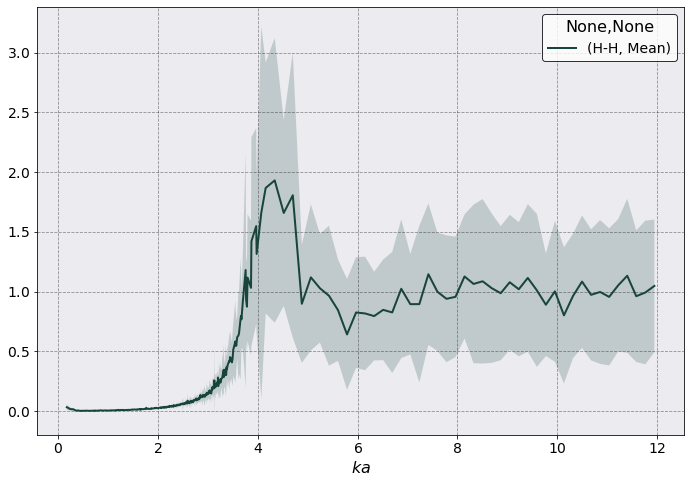

In [12]:
# Get the axes handle for the errorbar plot
ax = postproc.ssf.plot(
    scaling = 1./postproc.ssf.a_ws, # Need to divide because a_ws multiplies k
    y = ('H-H', "Mean"), # I want only the second column. Otherwise it will plot all the columns
    xlabel = r'$ka$'
)
# Errorbar plot
ax.fill_between( 
    postproc.ssf.dataframe[(' ','k values')] * postproc.ssf.a_ws,
    postproc.ssf.dataframe[("H-H", "Mean")] - postproc.ssf.dataframe[("H-H", "Std")],
    postproc.ssf.dataframe[("H-H", "Mean")] + postproc.ssf.dataframe[("H-H", "Std")],
    alpha = 0.2
)


As you can see the errorbars are fairly large for $ka > 4$. This is because for each $k$ value there are only $3 \times 500$ configuration on which to average. The number $500$ is the number of snapshots. The number $3$ comes from the three principal direction of $k$. For example $ka =  6.15$ corresponds to the three directions 

$$ ka = \frac{2 \pi}{L} |(34, 0, 0)| = \frac{2 \pi}{L}  |(0,34,0)| = \frac{2 \pi}{L}  |(0, 0, 34)|$$

To reduce the errorbar we could choose among increasing the number of snapshots, use the `angle_averaging = 'full'`, or increasing the number of particles. 
All these options are rather slow. More importantly we don't know which is the most effective. 

Probably, `angle_averaging = 'full'` will be more effective for the large $ka$ value, but it definitely wont' reduce the errorbars at low $ka$ values. However, assuming we don't want to restart the simulation we choose the second option

The following code computes

In [13]:
postproc.ssf.angle_averaging = 'full'
# Re-Initialize the class with the new parameters. 
postproc.ssf.setup(postproc.parameters)
# Check
postproc.ssf.pretty_print()



===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/yocp_pppm/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_yocp.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 1.5898e+10 [1/m]

Angle averaging choice: full
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 66, 66, 66
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	k_max = 20.6818 / a_ws = 1.8174e+12 [1/m]

Total number of k values to calculate = 300762
No. of unique ka values to calculate = 13310


Notice that we now have 300 762 combinations of $(n_x, n_y, n_z)$ to calculate. This will be rather slow.

## Dynamic Structure Factor

To be written soon

In [23]:
postproc.dsf.angle_averaging = 'custom'
postproc.dsf.no_slices = 2
postproc.dsf.max_ka_value = 12
postproc.dsf.max_aa_ka_value = 4.1
postproc.dsf.setup(postproc.parameters)
postproc.dsf.pretty_print()



====================== Dynamic Structure Factor ====================== 

k wavevector information saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/k_arrays.npz
n(k,t) data saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/yocp_pppm/PostProcessing/DynamicStructureFactor/Production/DynamicStructureFactor_yocp.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.frequencies, self.dataframe

Frequency Space Parameters:
	No. of slices = 2
	No. dumps per slice = 250
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0.0750 w_p = 1.2566e+15 [Hz]
	Maximum Frequency w_max = 2 pi /(prod_dump_step * dt)
	w_max = 9.3751 w_p = 1.5708e+17 [Hz]


Wavevector parameters:
Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 1.5898e+10 [1/m]

Angle averaging choice: custom
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 13, 13, 13
	Largest angle averaged k_max 

In [25]:
# postproc.dsf.compute()

In [ ]:
postproc.dsf.plot(
    scaling = postproc.dsf.total_plasma_frequency, 
    y = [('H-H', 'Mean', 'ka = 0.180919'),
         ('H-H', 'Mean', 'ka = 0.313361'),
         ('H-H', 'Mean', 'ka = 0.404547')], 
    logy = True, 
    xlim = (-3, 3)
)
postproc.dsf.plot(
    scaling = postproc.dsf.total_plasma_frequency, 
    y = [('He-He', 'Mean', 'ka = 0.180919'),
         ('He-He', 'Mean', 'ka = 0.313361'),
         ('He-He', 'Mean', 'ka = 0.404547')], 
    logy = True, 
    xlim = (-3, 3)
)

## Current Correlation Functions

In [ ]:
postproc.ccf.angle_averaging = 'custom'
postproc.ccf.no_slices = 2
postproc.ccf.max_ka_value = 12
postproc.ccf.max_aa_ka_value = 4.1
postproc.ccf.setup(postproc.parameters)
postproc.ccf.pretty_print()

In [ ]:
postproc.ccf.compute()

In [ ]:
postproc.ccf.plot(
    scaling = postproc.dsf.total_plasma_frequency, 
    y = [('H-H', 'Mean', 'ka = 0.180919'),
         ('H-H', 'Mean', 'ka = 0.313361'),
         ('H-H', 'Mean', 'ka = 0.404547')], 
    logy = True, 
    xlim = (-3, 3)
)
postproc.ccf.plot(
    scaling = postproc.dsf.total_plasma_frequency, 
    y = [('He-He', 'Mean', 'ka = 0.180919'),
         ('He-He', 'Mean', 'ka = 0.313361'),
         ('He-He', 'Mean', 'ka = 0.404547')], 
    logy = True, 
    xlim = (-3, 3)
)